# Exercises week 02 - Part 3

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import networkx as nx

In [2]:
mu = 2
sigma = 0.125
points = [random.gauss(mu, sigma) for _ in range(5000)]

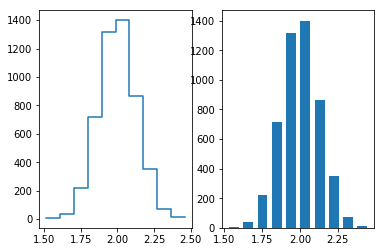

In [3]:
hist, bins = np.histogram(points, bins=10)
left, right = bins[:-1], bins[1:]
X = np.array([left, right]).T.flatten()
Y = np.array([hist, hist]).T.flatten()
plt.subplot(121)
plt.plot(X, Y)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.subplot(122)
plt.bar(center, hist, align='center', width=width)
plt.show()

I used the `matplotlib.pyplot.bar` function to let the library do most of the heavy lifiting for me.

In [4]:
lam = 10
N = 5000
poisson_points = np.random.poisson(lam=lam, size=N)
poisson_max = max(poisson_points)
poisson_min = min(poisson_points)

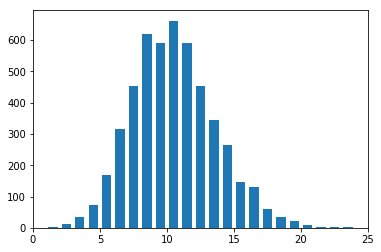

In [5]:
v = [x for x in range(poisson_min, poisson_max)]
hist, bins = np.histogram(poisson_points, bins=v)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

* Binning and plotting degree distributions. 
>   * Let's generate the Erdös-Renyi (ER) network which has a degree distribution that matches the Poisson distribution above. 
> First we have to figure out which values the ER parameters (_N_ and _p_) should assume. It's easy to see that $N = 5000$, but how do you find $p$? 
> **Hint**: The parameter $\lambda$ in the Poisson distribution corresponds to the average degree, so you have to find a $p$ that results in an average 
> degree, $k = 10$. And you know that $\langle k \rangle = p (N-1)$, which will give you $p$. Note that Python by default returns the result of divisions as the most precise of the datatypes involved (for instance, try computing `1/2` and `1.0/2.0` in your notebook). If you want division to always give you a decimal number, you can enter `from __future__ import division` at the beginning of your notebook.
>   * Now, use `networkx` to create the graph and extract the degree distribution.
>   * Finally, create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.

In [6]:
from __future__ import division
N = 500
p = lam / (N - 1)

In [7]:
E = nx.erdos_renyi_graph(N, p)

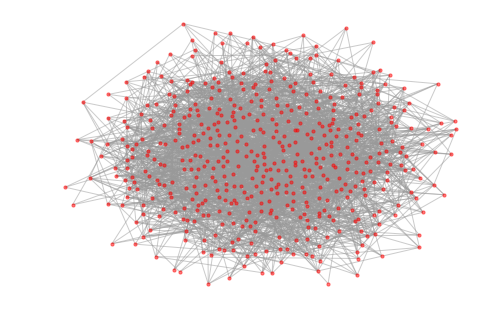

In [15]:
pos = nx.spring_layout(E, k=0.5)
nx.draw(E, pos=pos, node_size=10, alpha=0.5, edge_color='#999999')
plt.show()

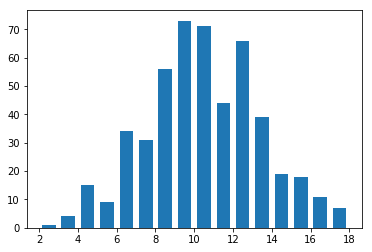

In [17]:
degrees = [E.degree(node) for node in E.nodes]
v = [x for x in range(min(degrees), max(degrees))]
hist, bins = np.histogram(degrees, bins=v)

width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()

Note that the graph has only been drawn with 500 nodes instead of the 5000 (do to performance) used when generating the poisson data, which is why the histogram does not look as smooth.
However, the same shape can be seen.